Import Libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

Build **2 Complex CNN**  model

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 

In [ ]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [ ]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 31s 319ms/step - loss: 1.5704 - accuracy: 0.5886 - val_loss: 0.5501 - val_accuracy: 0.7916
Epoch 2/20
94/94 [==============================] - 29s 312ms/step - loss: 0.5844 - accuracy: 0.7830 - val_loss: 0.4634 - val_accuracy: 0.8322
Epoch 3/20
94/94 [==============================] - 27s 290ms/step - loss: 0.5041 - accuracy: 0.8135 - val_loss: 0.4140 - val_accuracy: 0.8477
Epoch 4/20
94/94 [==============================] - 28s 302ms/step - loss: 0.4444 - accuracy: 0.8375 - val_loss: 0.3856 - val_accuracy: 0.8560
Epoch 5/20
94/94 [==============================] - 27s 291ms/step - loss: 0.4063 - accuracy: 0.8504 - val_loss: 0.3707 - val_accuracy: 0.8624
Epoch 6/20
94/94 [==============================] - 30s 319ms/step - loss: 0.3813 - accuracy: 0.8582 - val_loss: 0.3525 - val_accuracy: 0.8705
Epoch 7/20
94/94 [==============================] - 29s 311ms/step - loss: 0.3675 - accuracy: 0.8646 - val_loss: 0.3473 - val_accuracy: 0.8741

In [ ]:
y_pred = cnn_model2.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 10ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.15, 0.  , 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Test the Model

In [ ]:
# Testing the model of 2 complex CNN

In [ ]:
cnn_model2.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.3261 - accuracy: 0.8884


[0.3261258602142334, 0.8884000182151794]

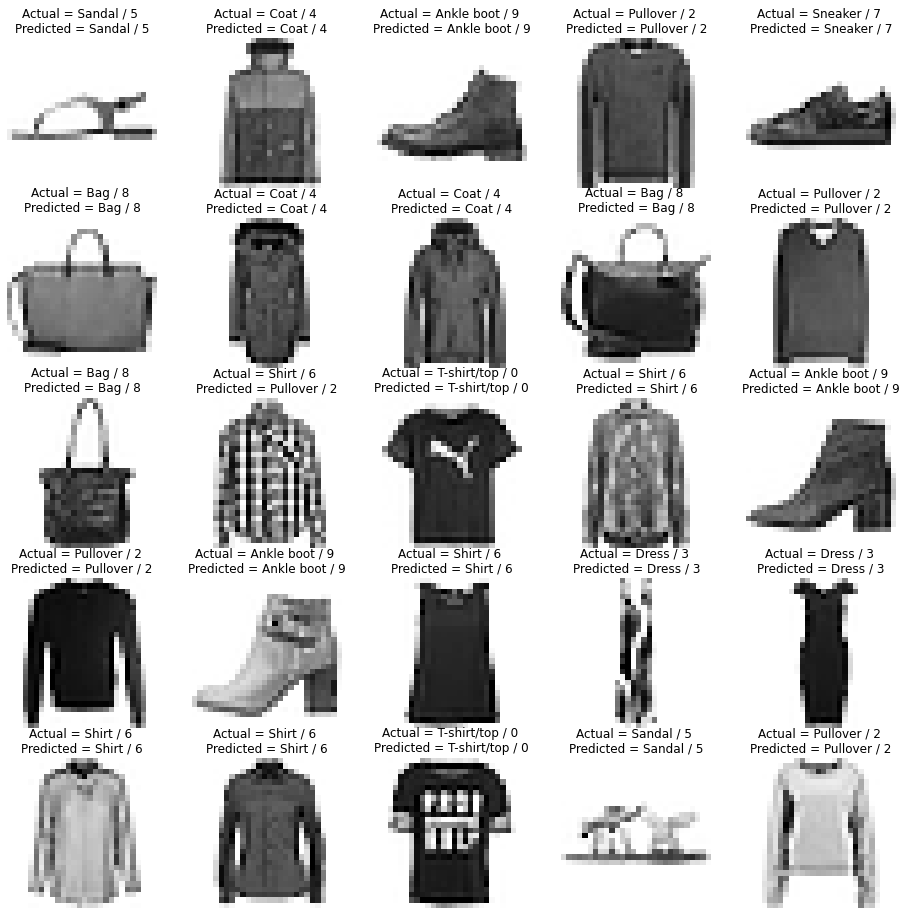

In [ ]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

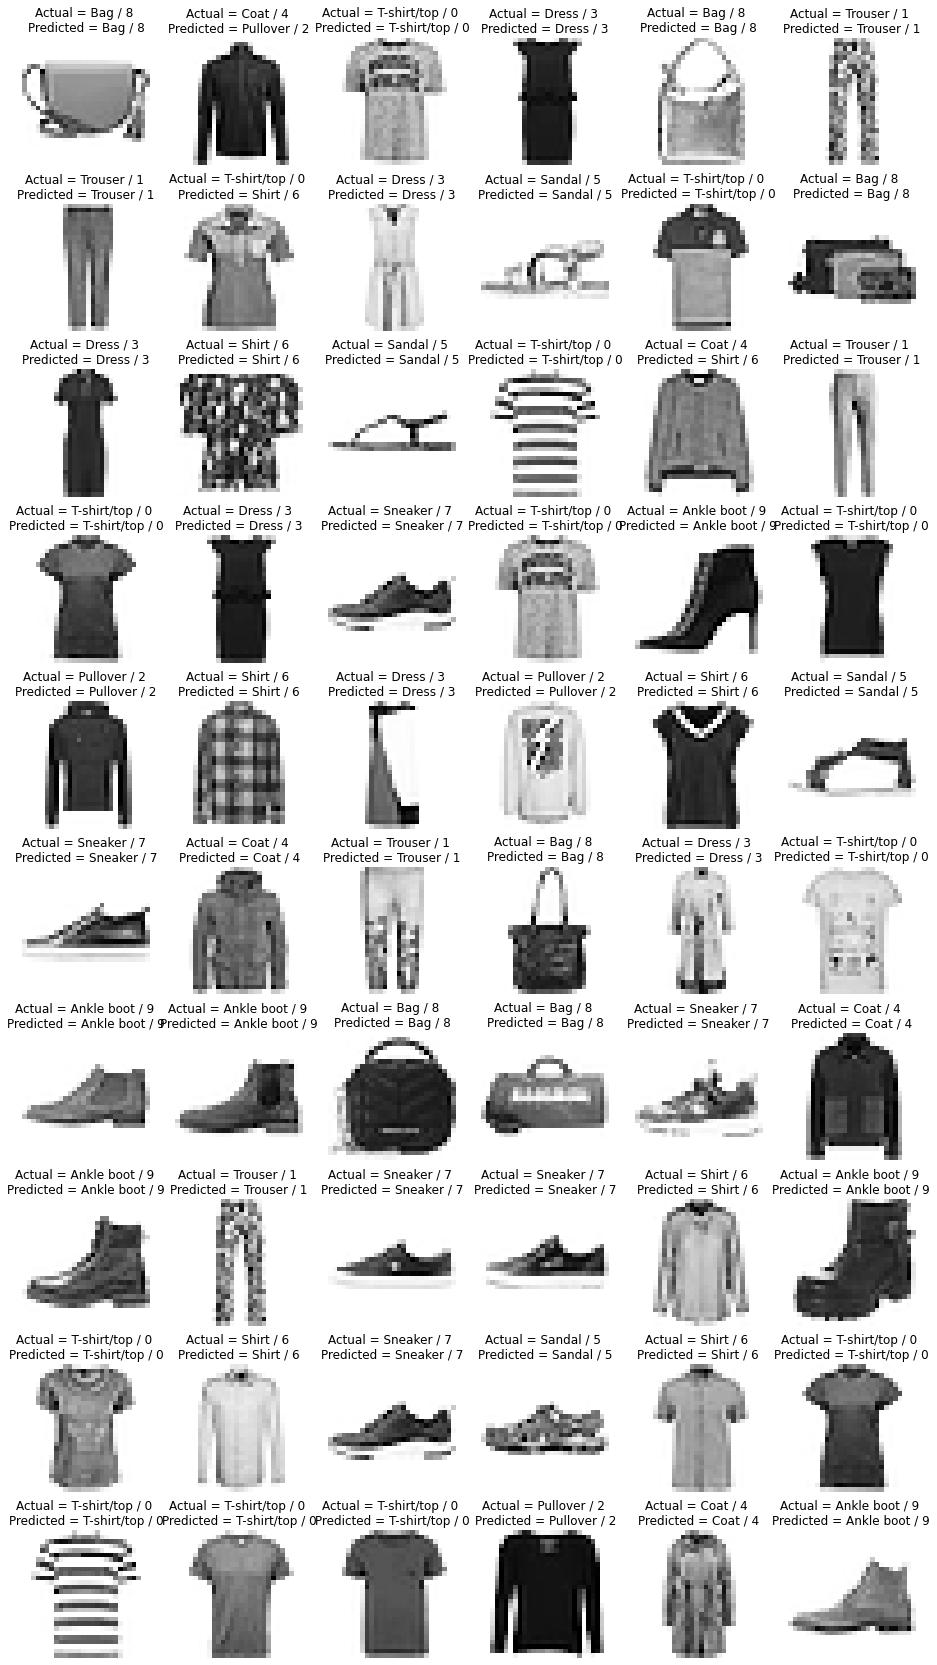

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.76      0.87      0.81      1000
       Dress       0.85      0.92      0.88      1000
        Coat       0.84      0.79      0.81      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.75      0.64      0.69      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



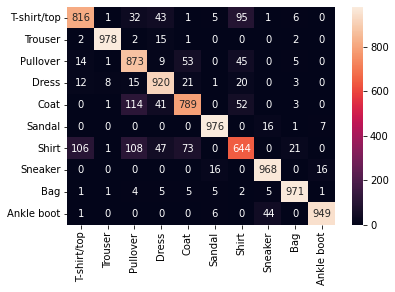

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

Build **3 complex CNN** model

In [ ]:
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 70s 740ms/step - loss: 1.3332 - accuracy: 0.5359 - val_loss: 0.5893 - val_accuracy: 0.7717
Epoch 2/50
94/94 [==============================] - 63s 666ms/step - loss: 0.5877 - accuracy: 0.7823 - val_loss: 0.4630 - val_accuracy: 0.8238
Epoch 3/50
94/94 [==============================] - 65s 687ms/step - loss: 0.4869 - accuracy: 0.8239 - val_loss: 0.3964 - val_accuracy: 0.8536
Epoch 4/50
94/94 [==============================] - 62s 654ms/step - loss: 0.4180 - accuracy: 0.8521 - val_loss: 0.3763 - val_accuracy: 0.8664
Epoch 5/50
94/94 [==============================] - 62s 662ms/step - loss: 0.3721 - accuracy: 0.8698 - val_loss: 0.3557 - val_accuracy: 0.8758
Epoch 6/50
94/94 [==============================] - 64s 681ms/step - loss: 0.3414 - accuracy: 0.8795 - val_loss: 0.3333 - val_accuracy: 0.8832
Epoch 7/50
94/94 [==============================] - 62s 657ms/step - loss: 0.3163 - accuracy: 0.8884 - val_loss: 0.3261 - val_accuracy: 0.8848

[0.5007569193840027, 0.8913999795913696]

In [ ]:
y_pred = cnn_model3.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 5s 15ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**Test** the model

In [ ]:
#Testing the model of 3 complex CNN

In [ ]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.5008 - accuracy: 0.8914


[0.5007569193840027, 0.8913999795913696]

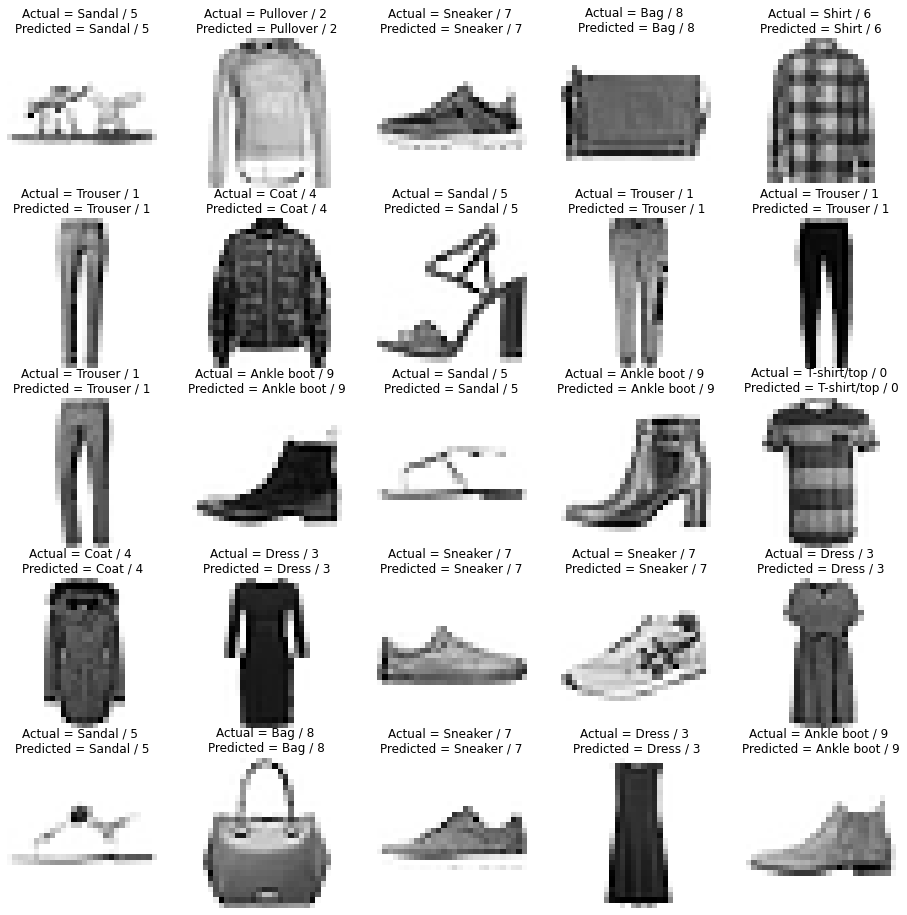

In [ ]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

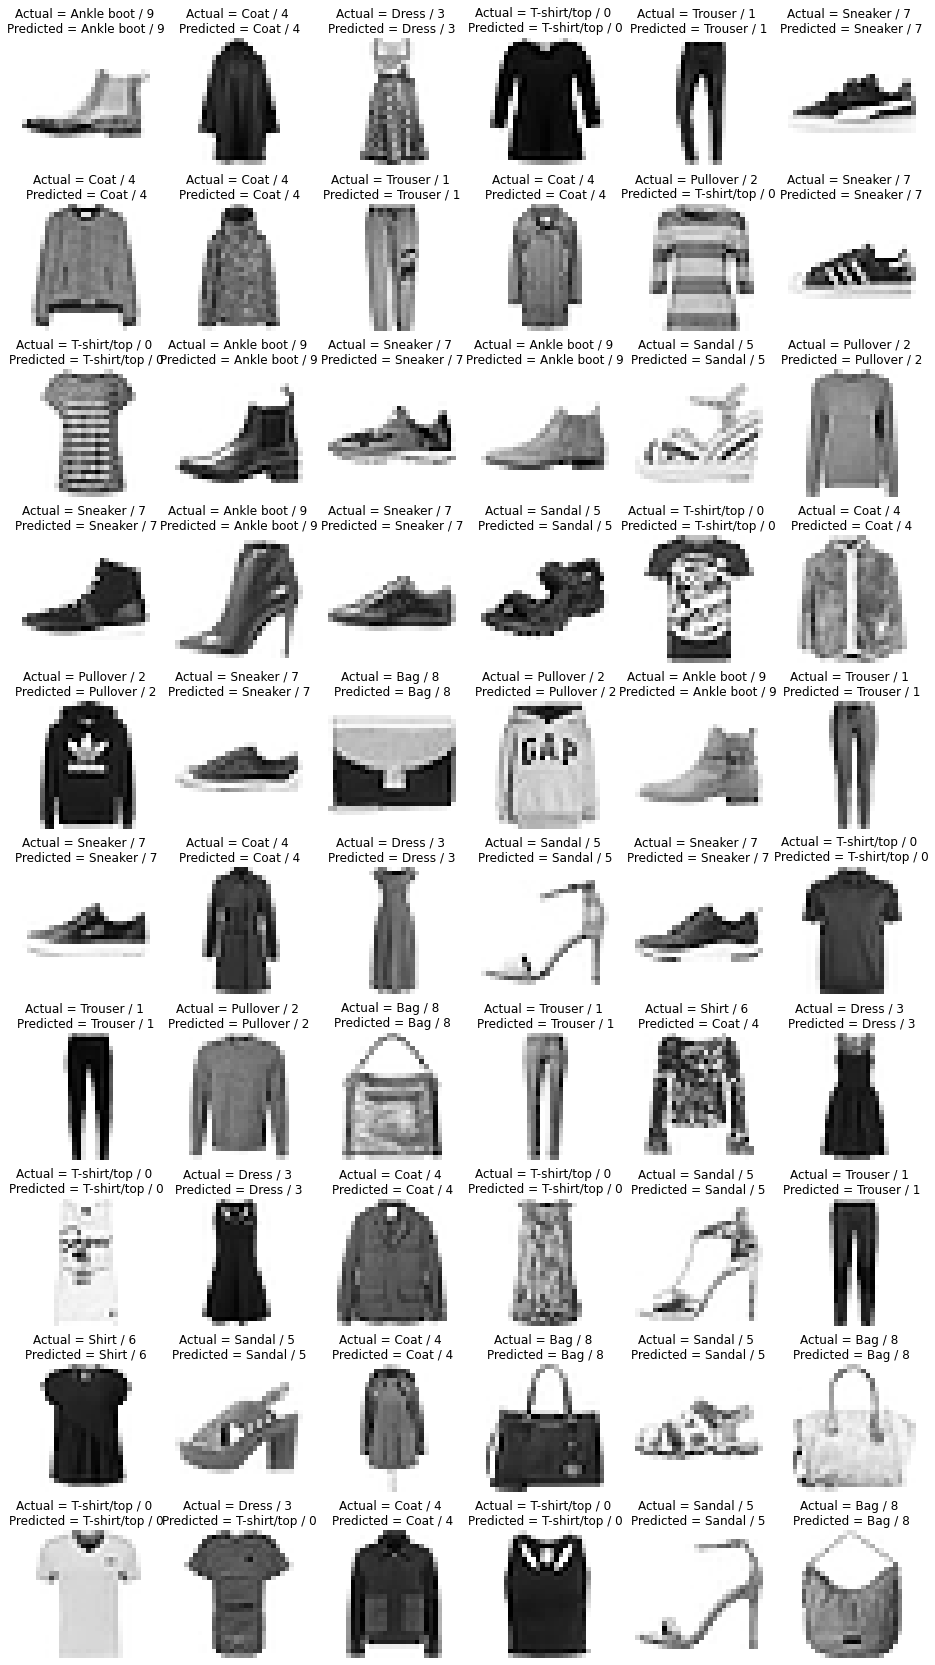

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.88      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.86      0.83      1000
       Dress       0.91      0.86      0.88      1000
        Coat       0.79      0.87      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.77      0.61      0.68      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



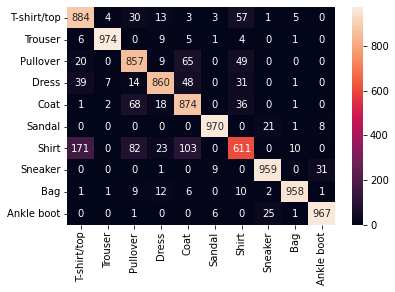

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)